In [11]:
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import yfinance as yfin

In [2]:
# mpf.plot(data, type='candle')
start = dt.datetime(2022,1,1)
end = dt.datetime.now

In [3]:
# try:
#  data = web.DataReader('BLK', 'yahoo', start, end)
# except TypeError as e:
# print("An error occurred:", e)

yfin.pdr_override() 
handler = pdr.get_data_yahoo('BLK', start='2020-10-24', end='2022-12-23')
print(handler.columns)

[*********************100%%**********************]  1 of 1 completed
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [4]:
handler = handler[['Open', 'High', 'Low', 'Close']]
handler.reset_index(inplace=True)
print(handler.head())

        Date        Open        High         Low       Close
0 2020-10-26  630.000000  631.590027  615.830017  622.190002
1 2020-10-27  620.320007  624.580017  613.469971  614.530029
2 2020-10-28  602.690002  606.450012  596.260010  600.710022
3 2020-10-29  600.210022  606.590027  590.260010  602.330017
4 2020-10-30  597.580017  600.869995  587.900024  599.210022


In [6]:
handler['Date'] = handler['Date'].map(mdates.date2num)
handler.head()

C:\Users\aalsa\AppData\Local\Temp\ipykernel_10348\3588994444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handler['Date'] = handler['Date'].map(mdates.date2num)


,Date,Open,High,Low,Close
0,18561.0,630.000000,631.590027,615.830017,622.190002
1,18562.0,620.320007,624.580017,613.469971,614.530029
2,18563.0,602.690002,606.450012,596.260010,600.710022
3,18564.0,600.210022,606.590027,590.260010,602.330017
4,18565.0,597.580017,600.869995,587.900024,599.210022


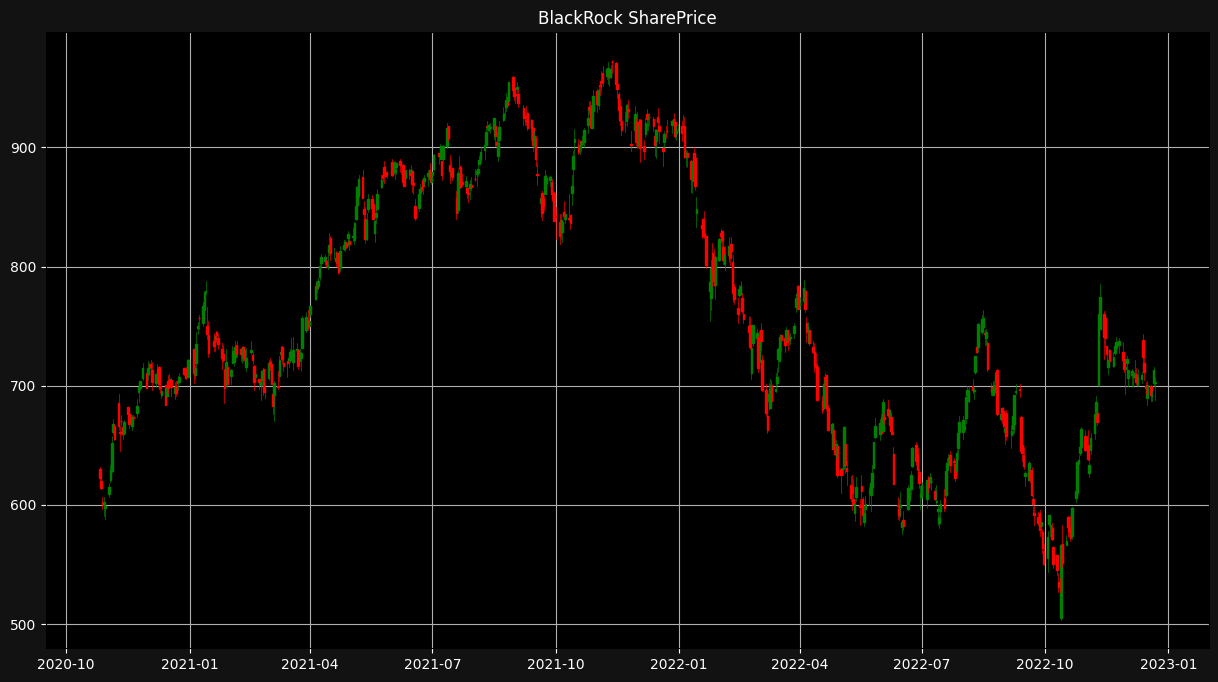

In [21]:
plt.figure(figsize=(15, 8)) 
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title('BlackRock SharePrice', color = 'white')
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors= 'white')
ax.tick_params(axis = 'y', colors='white')
ax.xaxis_date()
candlestick_ohlc(ax, handler.values, width =1.2, colorup='g')
plt.show()